# Setup

## Installations

In [ ]:
!pip install minatar > /dev/null

## Importations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from PIL import Image
from IPython.display import display, Image as JImage
import imageio
from tqdm.notebook import tqdm

## Jupyter extensions

In [2]:
%load_ext autoreload
%autoreload 2

# Environment

In [3]:
env = gym.make('MinAtar/Breakout-v1')
env.reset();

In [4]:
from utils.utils import state_to_image

def render_env(env):
    """Needed as env.render() did not work by itself"""
    img = state_to_image(env.render('array'))
    plt.imshow(img)
    plt.show()

def render_game(frames, fps=20, show_every_x_frames=1, path='game.gif', size=200):
    processed_frames = []
    for frame in frames[::show_every_x_frames]:
        img = Image.fromarray(state_to_image(frame)).resize((size, size), Image.Resampling.NEAREST)
        processed_frames.append(np.asarray(img))
    imageio.mimwrite(path, processed_frames, fps=fps)
    display(JImage(open(path, 'rb').read()))

def play_game(env, agent=None, fps=20, show_every_x_frames=1, path='game.gif', size=200):
    frames = []
    rewards = 0
    state = env.reset()
    choose_action = lambda s: env.action_space.sample() if agent is None else agent.act(s)
    while True:
        state, r, done, _ = env.step(choose_action(state))
        frames.append(state)
        rewards += r
        if done:
            break
    render_game(frames, fps, show_every_x_frames, path, size)
    print(f"Total rewards: {rewards}")

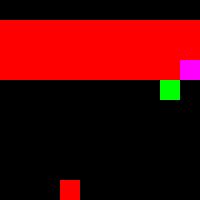

Total rewards: 1


In [5]:
play_game(env)

# Training agents

## Simple DQN

In [6]:
dqn_path = "./networks_weights/DQN"

In [7]:
from agents.dqn import DQNAgent

dqn = DQNAgent(env, gamma=0.999, batch_size=256, epsilon_min=0.002)
# dqn = DQNAgent.load('dqn_path')

Run the following command to monitor training: tensorboard --logdir ./logs


In [8]:
dqn.train(5_000)

Timestep: 2000, Loss: 2.5432: 100%|██████████| 2000/2000 [00:09<00:00, 219.22it/s]


In [9]:
dqn.save(dqn_path, override=True, save_memory=True)

Saved to ./networks_weights/DQN.zip


In [184]:
dqn2 = DQNAgent.load(dqn_path, env)

Run the following command to monitor training: tensorboard --logdir ./logs


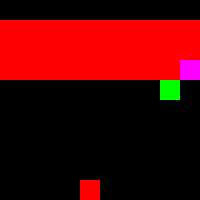

Total rewards: 1


In [14]:
play_game(env, dqn, path='./dqn.gif')

## Double DQN

In [15]:
ddqn_path = "./networks_weights/DDQN"

In [16]:
from agents.double_dqn import DoubleDQNAgent

ddqn = DoubleDQNAgent(env, gamma=0.999, batch_size=256, epsilon_min=0.002)
# ddqn = DoubleDQNAgent.load('ddqn_path')

Run the following command to monitor training: tensorboard --logdir ./logs


In [52]:
ddqn.train(5_000)

Timestep: 17000, Loss: 0.0049: 100%|██████████| 5000/5000 [00:36<00:00, 135.80it/s]


In [66]:
ddqn.save(ddqn_path, override=True, save_memory=True)

Saved to ./networks_weights/DDQN.zip


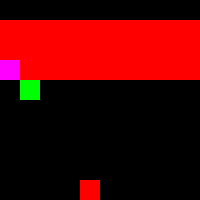

Total rewards: 8


In [72]:
play_game(env, ddqn, path='./ddqn.gif')